In [1]:
# import inbuilt modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# main module used for RDM calculations
import RDM_main
import rasterio as rio

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# dictionary for the country we want to calculate for. 'code' is two letter short form. 'full_name' is full name of the country. Note use %20 whereever there is a space in the country name for this.
country_dict={'code':'KE', 'full_name':'Kenya'}

# forming data_dict to define RDMCalculator class
polarities= ['identity','identity','identity','decreasing']
categories=['environmental', 'geographical', 'environmental', 'social']
data_types = ['solar', 'NDVI', 'wind', 'popdensity']
data_dict={'data_types':data_types, 'polarities':polarities, 'categories':categories}

In [3]:
# create instance of RDM calculator with data_dict
RDM = RDM_main.RDMCalculator(data_dict)

In [4]:
# calculate RDM using RDMCalculator instance for country defined in country_dict
RDM_dict1, weights_dict1, df_RDM1, meta_ref1 = RDM.get_rdm(country_dict, save_df=True, compress_df=False, save_as_tif=True)

Kenya is done, with file size = 13887
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  ...
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]]]


C:\Users\areidy\OneDrive - UNICEF\Documents\GitHub\rdm_analysis\RDM_calculation\Auto_Scaling\AutoScale.py:27: RuntimeWarning: All-NaN axis encountered
  in_span = log_b(np.nanmax(val[in_unit_circle]), base) - log_b(np.nanmin(val[in_unit_circle]), base)
C:\Users\areidy\OneDrive - UNICEF\Documents\GitHub\rdm_analysis\RDM_calculation\Auto_Scaling\AutoScale.py:32: RuntimeWarning: All-NaN axis encountered
  out_span = log_b(np.nanmax(val[out_unit_circle]), base) - log_b(np.nanmin(val[out_unit_circle]), base)


Time taken to run function:  0:00:25.119494


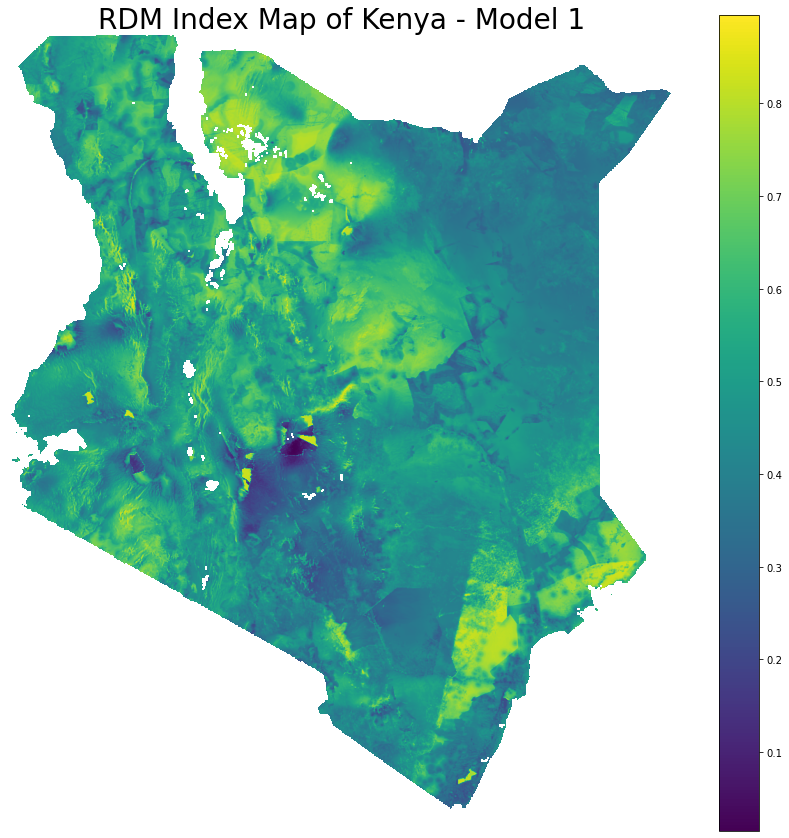

In [5]:
# plot of results
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rdm_map = ax.imshow(RDM_dict1['RDM'])
plt.title('RDM Index Map of Kenya - Model 1', fontsize=28)
ax.axis('off')
fig.colorbar(rdm_map, ax=ax)
fig.savefig('rdmi_model1.png')

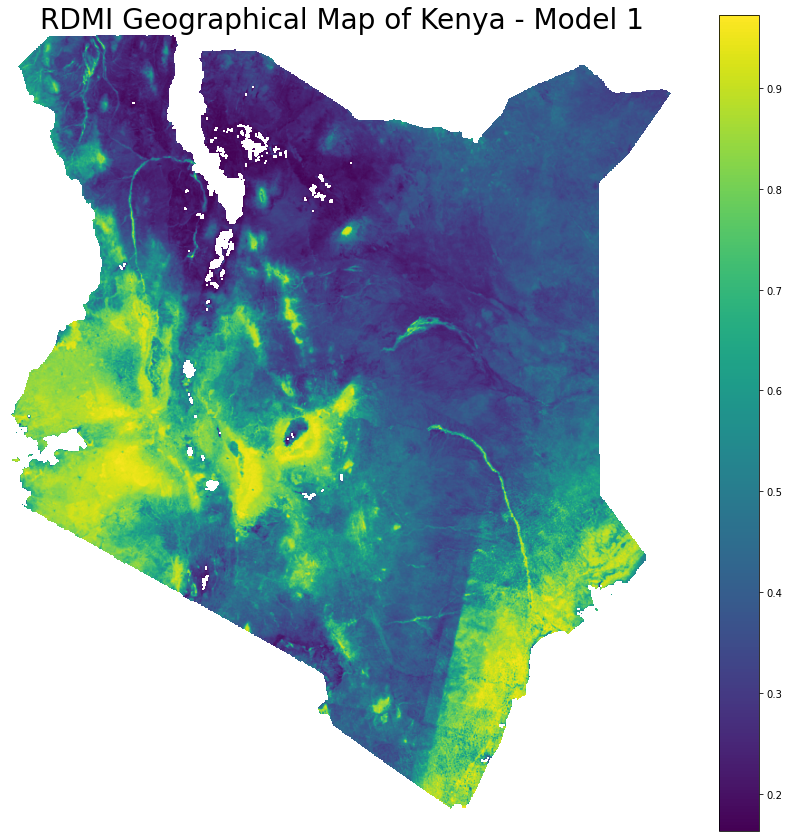

In [6]:
# plot of results
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rdm_map = ax.imshow(RDM_dict1['geographical'])
plt.title('RDMI Geographical Map of Kenya - Model 1', fontsize=28)
ax.axis('off')
fig.colorbar(rdm_map, ax=ax)
fig.savefig('rdmi_geo_model1.png')

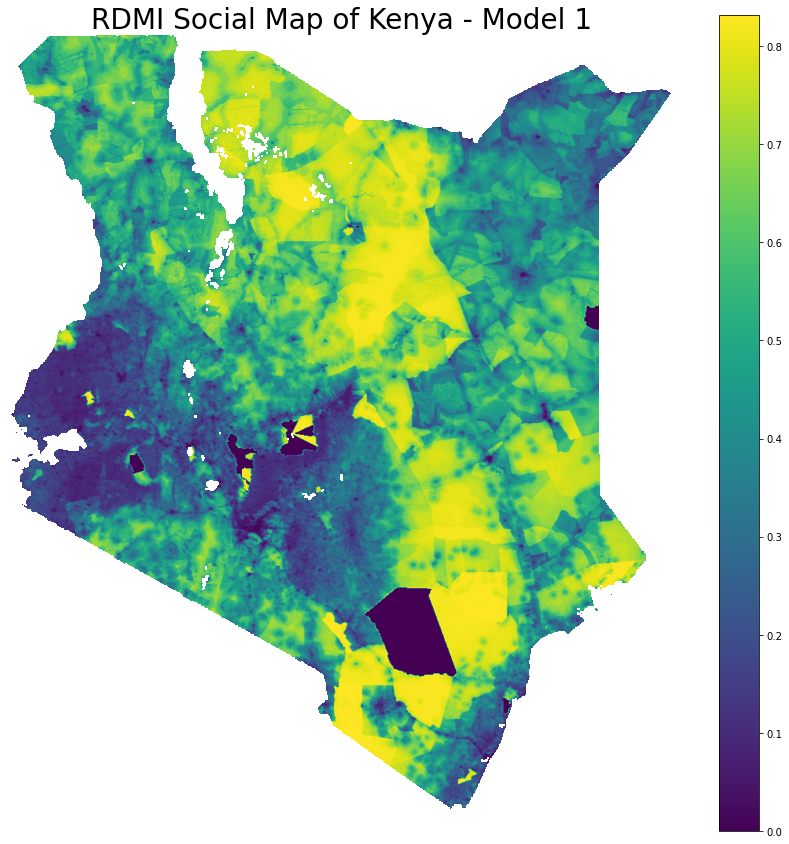

In [7]:
# plot of results
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rdm_map = ax.imshow(RDM_dict1['social'])
plt.title('RDMI Social Map of Kenya - Model 1', fontsize=28)
ax.axis('off')
fig.colorbar(rdm_map, ax=ax)
fig.savefig('rdmi_social_model1.png')

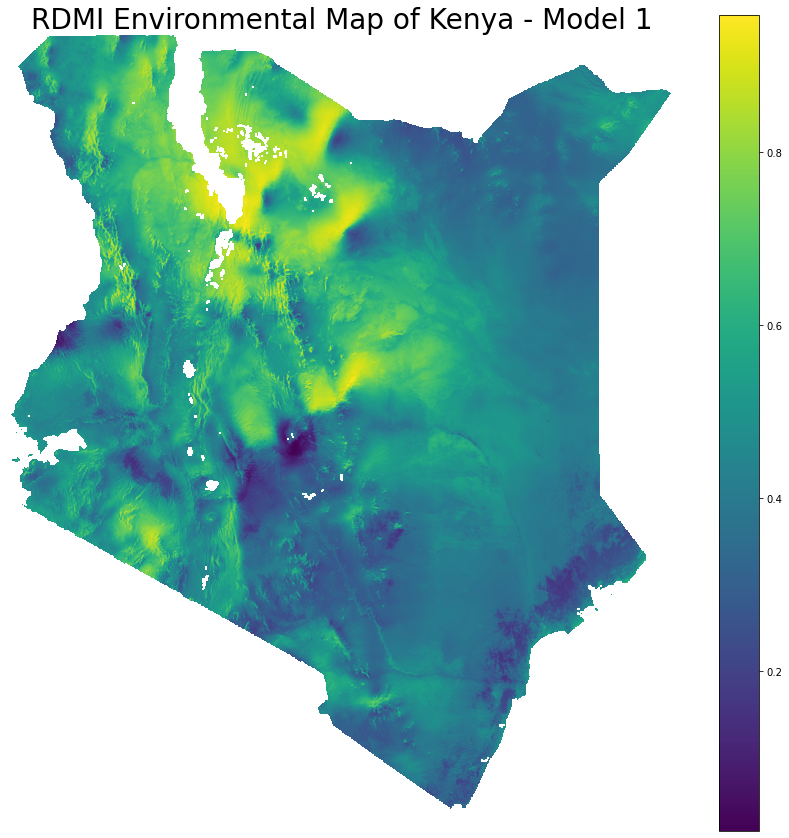

In [8]:
# plot of results
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rdm_map = ax.imshow(RDM_dict1['environmental'])
plt.title('RDMI Environmental Map of Kenya - Model 1', fontsize=28)
ax.axis('off')
fig.colorbar(rdm_map, ax=ax)
fig.savefig('rdmi_env_model1.png')

In [9]:
df_RDM1

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C  \
0       4.616667  34.958333  4.608333  34.966667  4.612500  34.962500   
1       4.616667  34.966667  4.608333  34.975000  4.612500  34.970833   
2       4.616667  34.975000  4.608333  34.983333  4.612500  34.979167   
3       4.616667  34.983333  4.608333  34.991667  4.612500  34.987500   
4       4.616667  34.991667  4.608333  35.000000  4.612500  34.995833   
...          ...        ...       ...        ...       ...        ...   
660899 -4.633333  39.191667 -4.641667  39.200000 -4.637500  39.195833   
660900 -4.633333  39.200000 -4.641667  39.208333 -4.637500  39.204167   
660901 -4.633333  39.208333 -4.641667  39.216667 -4.637500  39.212500   
660902 -4.633333  39.333333 -4.641667  39.341667 -4.637500  39.337500   
660903 -4.641667  39.208333 -4.650000  39.216667 -4.645833  39.212500   

          social  environmental  geographical       RDM  RDM_weighted  
0       0.685011       0.590348      0.443504  0.590348      0.540794  
1       0.683811       0.594370      0.583604  0.594370      0.616586  
2       0.691047       0.592271      0.432327  0.592271      0.536939  
3       0.702893       0.606459      0.306970  0.606459      0.475117  
4       0.706411       0.606471      0.272768  0.606471      0.457771  
...          ...            ...           ...       ...           ...  
660899  0.169639       0.313658      0.835583  0.313658      0.550082  
660900  0.175928       0.348315      0.853803  0.348315      0.566984  
660901  0.196001       0.337958      0.754705  0.337958      0.518291  
660902  0.231868       0.462631      0.817983  0.462631      0.582019  
660903  0.224528       0.347935      0.762662  0.347935      0.532990  

[660904 rows x 11 columns]

In [10]:
sample_df = df_RDM1.sample(n=250, random_state=1)

In [11]:
sample_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C  \
487283 -1.116667  35.225000 -1.125000  35.233333 -1.120833  35.229167   
257536  1.258333  40.266667  1.250000  40.275000  1.254167  40.270833   
657889 -4.258333  39.150000 -4.266667  39.158333 -4.262500  39.154167   
160010  2.383333  36.450000  2.375000  36.458333  2.379167  36.454167   
337313  0.408333  34.725000  0.400000  34.733333  0.404167  34.729167   
...          ...        ...       ...        ...       ...        ...   
534227 -1.600000  40.075000 -1.608333  40.083333 -1.604167  40.079167   
169152  2.283333  40.066667  2.275000  40.075000  2.279167  40.070833   
149711  2.508333  39.291667  2.500000  39.300000  2.504167  39.295833   
14377   4.183333  35.791667  4.175000  35.800000  4.179167  35.795833   
343948  0.341667  34.958333  0.333333  34.966667  0.337500  34.962500   

          social  environmental  geographical       RDM  RDM_weighted  
487283  0.490943       0.664221      0.755220  0.664221      0.659017  
257536  0.583537       0.402060      0.328471  0.402060      0.419224  
657889  0.282094       0.286478      0.723979  0.286478      0.521111  
160010  0.681967       0.771778      0.240943  0.681967      0.457282  
337313  0.100689       0.455840      0.841782  0.455840      0.552756  
...          ...            ...           ...       ...           ...  
534227  0.393287       0.399357      0.876839  0.399357      0.655030  
169152  0.401604       0.405701      0.385967  0.401604      0.393772  
149711  0.423240       0.334079      0.351181  0.351181      0.371241  
14377   0.515765       0.789457      0.290635  0.515765      0.434616  
343948  0.201356       0.476014      0.865454  0.476014      0.600037  

[250 rows x 11 columns]

In [12]:
sample_df = sample_df.sort_values(by=['RDM'], ascending=False)

In [13]:
sample_df['rank'] = sample_df['RDM'].rank(ascending=False)
sample_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C  \
381943 -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167   
103811  3.041667  36.658333  3.033333  36.666667  3.037500  36.662500   
577172 -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833   
587844 -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833   
130587  2.733333  38.208333  2.725000  38.216667  2.729167  38.212500   
...          ...        ...       ...        ...       ...        ...   
289948  0.900000  34.575000  0.891667  34.583333  0.895833  34.579167   
477479 -1.016667  37.058333 -1.025000  37.066667 -1.020833  37.062500   
393483 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500   
399740 -0.216667  37.416667 -0.225000  37.425000 -0.220833  37.420833   
413474 -0.366667  37.325000 -0.375000  37.333333 -0.370833  37.329167   

          social  environmental  geographical       RDM  RDM_weighted   rank  
381943  0.815694       0.221500      0.914665  0.815694      0.781600    1.0  
103811  0.803749       0.799950      0.202466  0.799950      0.478831    2.0  
577172  0.791813       0.346319      0.845841  0.791813      0.755368    3.0  
587844  0.830461       0.348420      0.790771  0.790771      0.738080    4.0  
130587  0.789675       0.788597      0.217505  0.788597      0.480862    5.0  
...          ...            ...           ...       ...           ...    ...  
289948  0.231205       0.154261      0.894713  0.231205      0.577802  246.0  
477479  0.199632       0.228053      0.785700  0.228053      0.519968  247.0  
393483  0.000000       0.142230      0.606901  0.142230      0.348330  248.0  
399740  0.000000       0.065010      0.921978  0.065010      0.506927  249.0  
413474  0.000000       0.018731      0.851152  0.018731      0.461907  250.0  

[250 rows x 12 columns]

In [14]:
px.scatter(sample_df, x='rank', y='RDM')

In [15]:
# create instance of RDM calculator with data_dict
RDM = RDM_main.RDMCalculator(data_dict)

In [16]:
# calculate RDM using RDMCalculator instance for country defined in country_dict
RDM_dict2, weights_dict2, df_RDM2, meta_ref2 = RDM.get_rdm(country_dict, rdm_agg='average', save_df=True, compress_df=False, save_as_tif=False)

Kenya is done, with file size = 13887
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  ...
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]]]


C:\Users\areidy\OneDrive - UNICEF\Documents\GitHub\rdm_analysis\RDM_calculation\Auto_Scaling\AutoScale.py:27: RuntimeWarning:

All-NaN axis encountered

C:\Users\areidy\OneDrive - UNICEF\Documents\GitHub\rdm_analysis\RDM_calculation\Auto_Scaling\AutoScale.py:32: RuntimeWarning:

All-NaN axis encountered



Time taken to run function:  0:00:25.357139


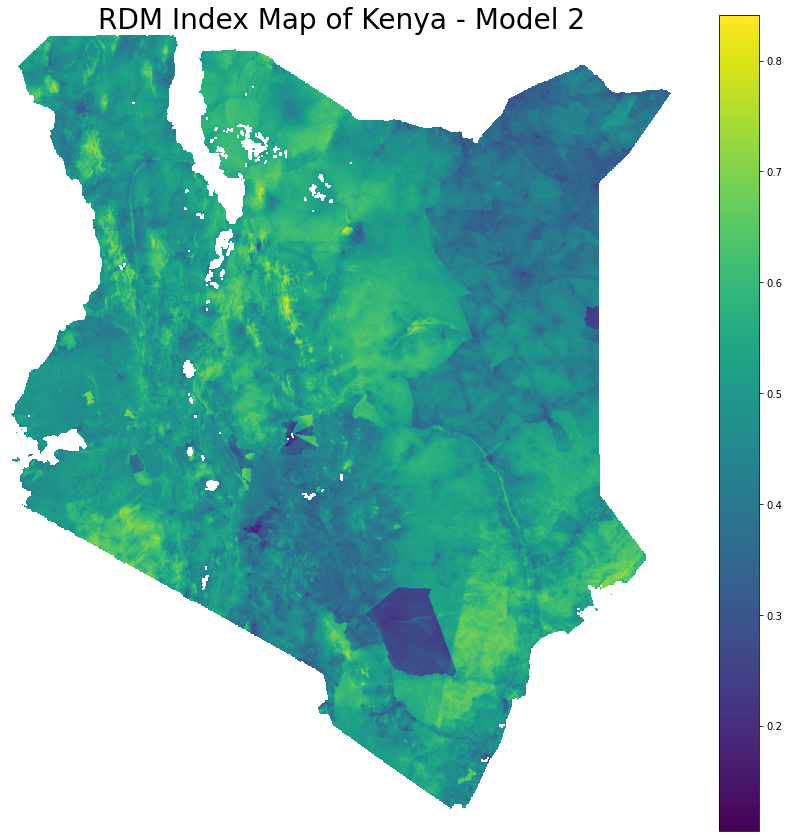

In [17]:
# plot of results
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rdm_map = ax.imshow(RDM_dict2['RDM'])
plt.title('RDM Index Map of Kenya - Model 2', fontsize=28)
ax.axis('off')
fig.colorbar(rdm_map, ax=ax)
fig.savefig('rdmi_model2.png')

In [18]:
RDM2 = df_RDM2[['Lat_C', 'Lon_C','RDM']]
RDM2 = RDM2.rename(columns={"RDM": "RDM2"})

In [19]:
RDM2

Lat_C      Lon_C      RDM2
0       4.612500  34.962500  0.572955
1       4.612500  34.970833  0.620595
2       4.612500  34.979167  0.571881
3       4.612500  34.987500  0.538774
4       4.612500  34.995833  0.528550
...          ...        ...       ...
660899 -4.637500  39.195833  0.439626
660900 -4.637500  39.204167  0.459349
660901 -4.637500  39.212500  0.429555
660902 -4.637500  39.337500  0.504161
660903 -4.645833  39.212500  0.445041

[660904 rows x 3 columns]

In [20]:
rank_df = pd.merge(sample_df,RDM2,on=['Lat_C', 'Lon_C'],how='left')
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
0   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
1    3.041667  36.658333  3.033333  36.666667  3.037500  36.662500  0.803749   
2   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
4    2.733333  38.208333  2.725000  38.216667  2.729167  38.212500  0.789675   
..        ...        ...       ...        ...       ...        ...       ...   
245  0.900000  34.575000  0.891667  34.583333  0.895833  34.579167  0.231205   
246 -1.016667  37.058333 -1.025000  37.066667 -1.020833  37.062500  0.199632   
247 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   
248 -0.216667  37.416667 -0.225000  37.425000 -0.220833  37.420833  0.000000   
249 -0.366667  37.325000 -0.375000  37.333333 -0.370833  37.329167  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  
0         0.221500      0.914665  0.815694      0.781600    1.0  0.650620  
1         0.799950      0.202466  0.799950      0.478831    2.0  0.602055  
2         0.346319      0.845841  0.791813      0.755368    3.0  0.661324  
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551  
4         0.788597      0.217505  0.788597      0.480862    5.0  0.598592  
..             ...           ...       ...           ...    ...       ...  
245       0.154261      0.894713  0.231205      0.577802  246.0  0.426726  
246       0.228053      0.785700  0.228053      0.519968  247.0  0.404462  
247       0.142230      0.606901  0.142230      0.348330  248.0  0.249710  
248       0.065010      0.921978  0.065010      0.506927  249.0  0.328996  
249       0.018731      0.851152  0.018731      0.461907  250.0  0.289961  

[250 rows x 13 columns]

In [21]:
rank_df = rank_df.sort_values(by=['RDM2'], ascending=False)
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
18   2.058333  36.825000  2.050000  36.833333  2.054167  36.829167  0.649013   
2   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
38   4.075000  34.366667  4.066667  34.375000  4.070833  34.370833  0.635850   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
0   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
..        ...        ...       ...        ...       ...        ...       ...   
199  1.133333  40.925000  1.125000  40.933333  1.129167  40.929167  0.000000   
211 -2.025000  38.816667 -2.033333  38.825000 -2.029167  38.820833  0.000000   
192 -2.733333  38.533333 -2.741667  38.541667 -2.737500  38.537500  0.000000   
205 -2.433333  38.700000 -2.441667  38.708333 -2.437500  38.704167  0.000000   
247 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  
18        0.811687      0.705315  0.705315      0.703335   19.0  0.722005  
2         0.346319      0.845841  0.791813      0.755368    3.0  0.661324  
38        0.708872      0.637571  0.637571      0.647530   39.0  0.660765  
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551  
0         0.221500      0.914665  0.815694      0.781600    1.0  0.650620  
..             ...           ...       ...           ...    ...       ...  
199       0.376982      0.436163  0.376982      0.290789  200.0  0.271048  
211       0.357801      0.447655  0.357801      0.294164  212.0  0.268485  
192       0.404887      0.384292  0.384292      0.266916  193.0  0.263060  
205       0.365641      0.400891  0.365641      0.270091  206.0  0.255511  
247       0.142230      0.606901  0.142230      0.348330  248.0  0.249710  

[250 rows x 13 columns]

In [22]:
rank_df['rank2'] = rank_df['RDM2'].rank(ascending=False)
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
18   2.058333  36.825000  2.050000  36.833333  2.054167  36.829167  0.649013   
2   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
38   4.075000  34.366667  4.066667  34.375000  4.070833  34.370833  0.635850   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
0   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
..        ...        ...       ...        ...       ...        ...       ...   
199  1.133333  40.925000  1.125000  40.933333  1.129167  40.929167  0.000000   
211 -2.025000  38.816667 -2.033333  38.825000 -2.029167  38.820833  0.000000   
192 -2.733333  38.533333 -2.741667  38.541667 -2.737500  38.537500  0.000000   
205 -2.433333  38.700000 -2.441667  38.708333 -2.437500  38.704167  0.000000   
247 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  \
18        0.811687      0.705315  0.705315      0.703335   19.0  0.722005   
2         0.346319      0.845841  0.791813      0.755368    3.0  0.661324   
38        0.708872      0.637571  0.637571      0.647530   39.0  0.660765   
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551   
0         0.221500      0.914665  0.815694      0.781600    1.0  0.650620   
..             ...           ...       ...           ...    ...       ...   
199       0.376982      0.436163  0.376982      0.290789  200.0  0.271048   
211       0.357801      0.447655  0.357801      0.294164  212.0  0.268485   
192       0.404887      0.384292  0.384292      0.266916  193.0  0.263060   
205       0.365641      0.400891  0.365641      0.270091  206.0  0.255511   
247       0.142230      0.606901  0.142230      0.348330  248.0  0.249710   

     rank2  
18     1.0  
2      2.0  
38     3.0  
3      4.0  
0      5.0  
..     ...  
199  246.0  
211  247.0  
192  248.0  
205  249.0  
247  250.0  

[250 rows x 14 columns]

In [23]:
# set up plotly figure
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=rank_df['rank'],
    y=rank_df['RDM'],
    hovertext=rank_df['rank2'],
    marker=dict(
        color="blue"
    ),
    mode='markers',
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=rank_df['rank'],
    y=rank_df['RDM2'],
    hovertext=rank_df['rank2'],
    marker=dict(
        color="green"
    ),
    mode='markers',
))

fig.update_layout(
    width=1400,
    height=700
)

fig.show()

In [24]:
rank_df = rank_df.sort_values(by=['RDM2'], ascending=False)
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
18   2.058333  36.825000  2.050000  36.833333  2.054167  36.829167  0.649013   
2   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
38   4.075000  34.366667  4.066667  34.375000  4.070833  34.370833  0.635850   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
0   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
..        ...        ...       ...        ...       ...        ...       ...   
199  1.133333  40.925000  1.125000  40.933333  1.129167  40.929167  0.000000   
211 -2.025000  38.816667 -2.033333  38.825000 -2.029167  38.820833  0.000000   
192 -2.733333  38.533333 -2.741667  38.541667 -2.737500  38.537500  0.000000   
205 -2.433333  38.700000 -2.441667  38.708333 -2.437500  38.704167  0.000000   
247 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  \
18        0.811687      0.705315  0.705315      0.703335   19.0  0.722005   
2         0.346319      0.845841  0.791813      0.755368    3.0  0.661324   
38        0.708872      0.637571  0.637571      0.647530   39.0  0.660765   
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551   
0         0.221500      0.914665  0.815694      0.781600    1.0  0.650620   
..             ...           ...       ...           ...    ...       ...   
199       0.376982      0.436163  0.376982      0.290789  200.0  0.271048   
211       0.357801      0.447655  0.357801      0.294164  212.0  0.268485   
192       0.404887      0.384292  0.384292      0.266916  193.0  0.263060   
205       0.365641      0.400891  0.365641      0.270091  206.0  0.255511   
247       0.142230      0.606901  0.142230      0.348330  248.0  0.249710   

     rank2  
18     1.0  
2      2.0  
38     3.0  
3      4.0  
0      5.0  
..     ...  
199  246.0  
211  247.0  
192  248.0  
205  249.0  
247  250.0  

[250 rows x 14 columns]

In [25]:
rank_df['diff_r1_r2'] = rank_df['rank'] - rank_df['rank2']

In [26]:
rank_df['abs_diff_r1_r2'] = rank_df['diff_r1_r2'].abs()
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
18   2.058333  36.825000  2.050000  36.833333  2.054167  36.829167  0.649013   
2   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
38   4.075000  34.366667  4.066667  34.375000  4.070833  34.370833  0.635850   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
0   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
..        ...        ...       ...        ...       ...        ...       ...   
199  1.133333  40.925000  1.125000  40.933333  1.129167  40.929167  0.000000   
211 -2.025000  38.816667 -2.033333  38.825000 -2.029167  38.820833  0.000000   
192 -2.733333  38.533333 -2.741667  38.541667 -2.737500  38.537500  0.000000   
205 -2.433333  38.700000 -2.441667  38.708333 -2.437500  38.704167  0.000000   
247 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  \
18        0.811687      0.705315  0.705315      0.703335   19.0  0.722005   
2         0.346319      0.845841  0.791813      0.755368    3.0  0.661324   
38        0.708872      0.637571  0.637571      0.647530   39.0  0.660765   
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551   
0         0.221500      0.914665  0.815694      0.781600    1.0  0.650620   
..             ...           ...       ...           ...    ...       ...   
199       0.376982      0.436163  0.376982      0.290789  200.0  0.271048   
211       0.357801      0.447655  0.357801      0.294164  212.0  0.268485   
192       0.404887      0.384292  0.384292      0.266916  193.0  0.263060   
205       0.365641      0.400891  0.365641      0.270091  206.0  0.255511   
247       0.142230      0.606901  0.142230      0.348330  248.0  0.249710   

     rank2  diff_r1_r2  abs_diff_r1_r2  
18     1.0        18.0            18.0  
2      2.0         1.0             1.0  
38     3.0        36.0            36.0  
3      4.0         0.0             0.0  
0      5.0        -4.0             4.0  
..     ...         ...             ...  
199  246.0       -46.0            46.0  
211  247.0       -35.0            35.0  
192  248.0       -55.0            55.0  
205  249.0       -43.0            43.0  
247  250.0        -2.0             2.0  

[250 rows x 16 columns]

In [27]:
def get_rank_change_stats(min=0, max=15):
    num_countries = len(rank_df.loc[(rank_df['abs_diff_r1_r2'] >= min) & (rank_df['abs_diff_r1_r2'] <= max)])
    percent_countries = num_countries / 250 * 100
    change_stats = [num_countries, percent_countries]
    print(f"{num_countries} countries of 250 countries ({percent_countries}%) moved between {min} and {max} places in the ranking")
    

In [28]:
print(get_rank_change_stats(0,5))
print(get_rank_change_stats(6,15))
print(get_rank_change_stats(16,50))
print(get_rank_change_stats(51,100))
print(get_rank_change_stats(101,250))
print(get_rank_change_stats(20,250))

40 countries of 250 countries (16.0%) moved between 0 and 5 places in the ranking
None
54 countries of 250 countries (21.6%) moved between 6 and 15 places in the ranking
None
110 countries of 250 countries (44.0%) moved between 16 and 50 places in the ranking
None
41 countries of 250 countries (16.400000000000002%) moved between 51 and 100 places in the ranking
None
5 countries of 250 countries (2.0%) moved between 101 and 250 places in the ranking
None
144 countries of 250 countries (57.599999999999994%) moved between 20 and 250 places in the ranking
None


<AxesSubplot:xlabel='abs_diff_r1_r2', ylabel='Count'>

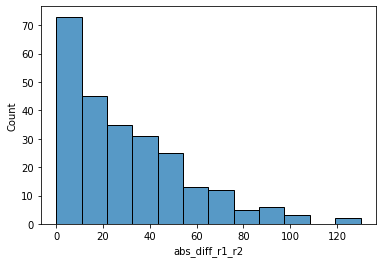

In [29]:
sns.histplot(data=rank_df, x='abs_diff_r1_r2',)

In [30]:
# dictionary for the country we want to calculate for. 'code' is two letter short form. 'full_name' is full name of the country. Note use %20 whereever there is a space in the country name for this.
country_dict={'code':'KE', 'full_name':'Kenya'}

# forming data_dict to define RDMCalculator class
polarities= ['identity','identity','decreasing']
categories=['environmental','environmental', 'social']
data_types = ['solar', 'wind', 'popdensity']
data_dict={'data_types':data_types, 'polarities':polarities, 'categories':categories}

In [31]:
# create instance of RDM calculator with data_dict
RDM = RDM_main.RDMCalculator(data_dict)

In [32]:
# calculate RDM using RDMCalculator instance for country defined in country_dict
RDM_dict3, weights_dict3, df_RDM3, meta_ref3 = RDM.get_rdm(country_dict, save_df=True, compress_df=False, save_as_tif=True)

Kenya is done, with file size = 13887
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  ...
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]]]


C:\Users\areidy\OneDrive - UNICEF\Documents\GitHub\rdm_analysis\RDM_calculation\Auto_Scaling\AutoScale.py:27: RuntimeWarning:

All-NaN axis encountered



Time taken to run function:  0:00:27.081524


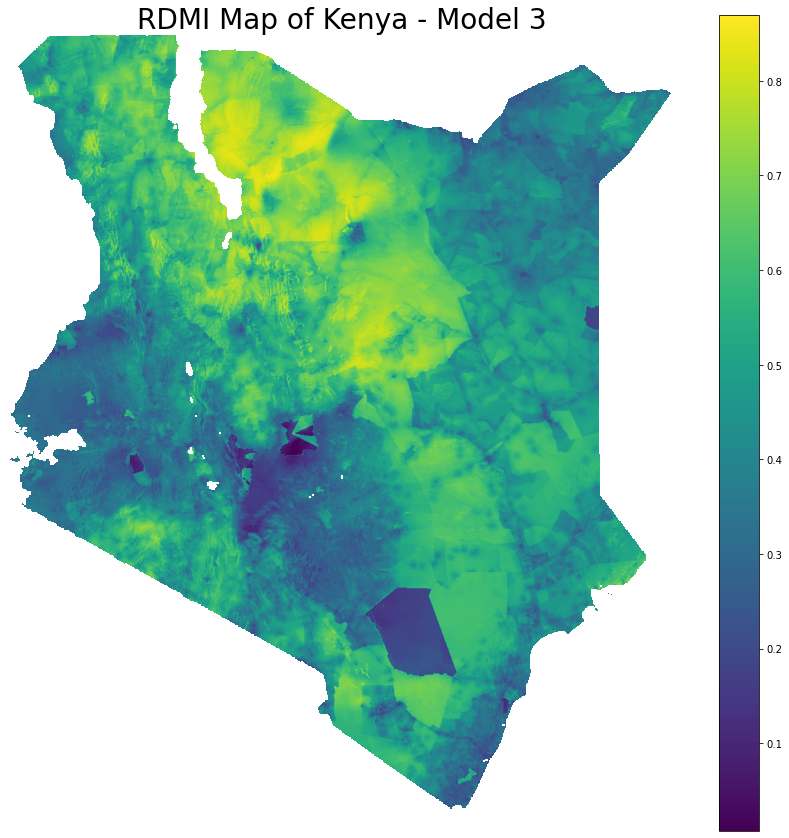

In [33]:
# plot of results
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rdm_map = ax.imshow(RDM_dict3['RDM'])
plt.title('RDMI Map of Kenya - Model 3', fontsize=28)
ax.axis('off')
fig.colorbar(rdm_map, ax=ax)
fig.savefig('rdmi_model3.png')

In [34]:
RDM3 = df_RDM3[['Lat_C', 'Lon_C','RDM']]
RDM3 = RDM3.rename(columns={"RDM": "RDM3"})

In [35]:
rank_df = pd.merge(rank_df,RDM3,on=['Lat_C', 'Lon_C'],how='left')
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
0    2.058333  36.825000  2.050000  36.833333  2.054167  36.829167  0.649013   
1   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
2    4.075000  34.366667  4.066667  34.375000  4.070833  34.370833  0.635850   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
4   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
..        ...        ...       ...        ...       ...        ...       ...   
245  1.133333  40.925000  1.125000  40.933333  1.129167  40.929167  0.000000   
246 -2.025000  38.816667 -2.033333  38.825000 -2.029167  38.820833  0.000000   
247 -2.733333  38.533333 -2.741667  38.541667 -2.737500  38.537500  0.000000   
248 -2.433333  38.700000 -2.441667  38.708333 -2.437500  38.704167  0.000000   
249 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  \
0         0.811687      0.705315  0.705315      0.703335   19.0  0.722005   
1         0.346319      0.845841  0.791813      0.755368    3.0  0.661324   
2         0.708872      0.637571  0.637571      0.647530   39.0  0.660765   
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551   
4         0.221500      0.914665  0.815694      0.781600    1.0  0.650620   
..             ...           ...       ...           ...    ...       ...   
245       0.376982      0.436163  0.376982      0.290789  200.0  0.271048   
246       0.357801      0.447655  0.357801      0.294164  212.0  0.268485   
247       0.404887      0.384292  0.384292      0.266916  193.0  0.263060   
248       0.365641      0.400891  0.365641      0.270091  206.0  0.255511   
249       0.142230      0.606901  0.142230      0.348330  248.0  0.249710   

     rank2  diff_r1_r2  abs_diff_r1_r2      RDM3  
0      1.0        18.0            18.0  0.730350  
1      2.0         1.0             1.0  0.569066  
2      3.0        36.0            36.0  0.672361  
3      4.0         0.0             0.0  0.589441  
4      5.0        -4.0             4.0  0.518597  
..     ...         ...             ...       ...  
245  246.0       -46.0            46.0  0.188491  
246  247.0       -35.0            35.0  0.178900  
247  248.0       -55.0            55.0  0.202444  
248  249.0       -43.0            43.0  0.182821  
249  250.0        -2.0             2.0  0.071115  

[250 rows x 17 columns]

In [36]:
rank_df = rank_df.sort_values(by=['RDM'], ascending=False)
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
4   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
21   3.041667  36.658333  3.033333  36.666667  3.037500  36.662500  0.803749   
1   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
22   2.733333  38.208333  2.725000  38.216667  2.729167  38.212500  0.789675   
..        ...        ...       ...        ...       ...        ...       ...   
187  0.900000  34.575000  0.891667  34.583333  0.895833  34.579167  0.231205   
201 -1.016667  37.058333 -1.025000  37.066667 -1.020833  37.062500  0.199632   
249 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   
239 -0.216667  37.416667 -0.225000  37.425000 -0.220833  37.420833  0.000000   
244 -0.366667  37.325000 -0.375000  37.333333 -0.370833  37.329167  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  \
4         0.221500      0.914665  0.815694      0.781600    1.0  0.650620   
21        0.799950      0.202466  0.799950      0.478831    2.0  0.602055   
1         0.346319      0.845841  0.791813      0.755368    3.0  0.661324   
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551   
22        0.788597      0.217505  0.788597      0.480862    5.0  0.598592   
..             ...           ...       ...           ...    ...       ...   
187       0.154261      0.894713  0.231205      0.577802  246.0  0.426726   
201       0.228053      0.785700  0.228053      0.519968  247.0  0.404462   
249       0.142230      0.606901  0.142230      0.348330  248.0  0.249710   
239       0.065010      0.921978  0.065010      0.506927  249.0  0.328996   
244       0.018731      0.851152  0.018731      0.461907  250.0  0.289961   

     rank2  diff_r1_r2  abs_diff_r1_r2      RDM3  
4      5.0        -4.0             4.0  0.518597  
21    22.0       -20.0            20.0  0.801849  
1      2.0         1.0             1.0  0.569066  
3      4.0         0.0             0.0  0.589441  
22    23.0       -18.0            18.0  0.789136  
..     ...         ...             ...       ...  
187  188.0        58.0            58.0  0.192733  
201  202.0        45.0            45.0  0.213843  
249  250.0        -2.0             2.0  0.071115  
239  240.0         9.0             9.0  0.032505  
244  245.0         5.0             5.0  0.009365  

[250 rows x 17 columns]

In [37]:
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
4   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
21   3.041667  36.658333  3.033333  36.666667  3.037500  36.662500  0.803749   
1   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
22   2.733333  38.208333  2.725000  38.216667  2.729167  38.212500  0.789675   
..        ...        ...       ...        ...       ...        ...       ...   
187  0.900000  34.575000  0.891667  34.583333  0.895833  34.579167  0.231205   
201 -1.016667  37.058333 -1.025000  37.066667 -1.020833  37.062500  0.199632   
249 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   
239 -0.216667  37.416667 -0.225000  37.425000 -0.220833  37.420833  0.000000   
244 -0.366667  37.325000 -0.375000  37.333333 -0.370833  37.329167  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  \
4         0.221500      0.914665  0.815694      0.781600    1.0  0.650620   
21        0.799950      0.202466  0.799950      0.478831    2.0  0.602055   
1         0.346319      0.845841  0.791813      0.755368    3.0  0.661324   
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551   
22        0.788597      0.217505  0.788597      0.480862    5.0  0.598592   
..             ...           ...       ...           ...    ...       ...   
187       0.154261      0.894713  0.231205      0.577802  246.0  0.426726   
201       0.228053      0.785700  0.228053      0.519968  247.0  0.404462   
249       0.142230      0.606901  0.142230      0.348330  248.0  0.249710   
239       0.065010      0.921978  0.065010      0.506927  249.0  0.328996   
244       0.018731      0.851152  0.018731      0.461907  250.0  0.289961   

     rank2  diff_r1_r2  abs_diff_r1_r2      RDM3  
4      5.0        -4.0             4.0  0.518597  
21    22.0       -20.0            20.0  0.801849  
1      2.0         1.0             1.0  0.569066  
3      4.0         0.0             0.0  0.589441  
22    23.0       -18.0            18.0  0.789136  
..     ...         ...             ...       ...  
187  188.0        58.0            58.0  0.192733  
201  202.0        45.0            45.0  0.213843  
249  250.0        -2.0             2.0  0.071115  
239  240.0         9.0             9.0  0.032505  
244  245.0         5.0             5.0  0.009365  

[250 rows x 17 columns]

In [38]:
rank_df.describe()

Lat_TL      Lon_TL      Lat_BR      Lon_BR       Lat_C       Lon_C  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     0.387600   38.018867    0.379267   38.027200    0.383433   38.023033   
std      2.231940    1.942584    2.231940    1.942584    2.231940    1.942584   
min     -4.425000   34.175000   -4.433333   34.183333   -4.429167   34.179167   
25%     -1.341667   36.429167   -1.350000   36.437500   -1.345833   36.433333   
50%      0.512500   38.287500    0.504167   38.295833    0.508333   38.291667   
75%      2.283333   39.741667    2.275000   39.750000    2.279167   39.745833   
max      4.566667   41.691667    4.558333   41.700000    4.562500   41.695833   

           social  environmental  geographical         RDM  RDM_weighted  \
count  250.000000     250.000000    250.000000  250.000000    250.000000   
mean     0.477312       0.472254      0.502886    0.481508      0.490363   
std      0.218311       0.162314      0.210797    0.137335      0.103999   
min      0.000000       0.018731      0.169186    0.018731      0.261243   
25%      0.301323       0.362163      0.335188    0.388535      0.416769   
50%      0.494284       0.434201      0.433581    0.466367      0.485384   
75%      0.669872       0.573150      0.688192    0.557938      0.561683   
max      0.830696       0.866757      0.943353    0.815694      0.781600   

             rank        RDM2       rank2  diff_r1_r2  abs_diff_r1_r2  \
count  250.000000  250.000000  250.000000  250.000000      250.000000   
mean   125.500000    0.484151  125.500000    0.000000       30.048000   
std     72.312977    0.089204   72.312977   39.640047       25.784201   
min      1.000000    0.249710    1.000000  -92.000000        0.000000   
25%     63.250000    0.426770   63.250000  -27.000000        9.000000   
50%    125.500000    0.489662  125.500000   -4.000000       24.500000   
75%    187.750000    0.552782  187.750000   18.000000       44.750000   
max    250.000000    0.722005  250.000000  130.000000      130.000000   

             RDM3  
count  250.000000  
mean     0.474783  
std      0.150409  
min      0.009365  
25%      0.369038  
50%      0.471087  
75%      0.588895  
max      0.804277

In [39]:
rank_df = rank_df.sort_values(by=['RDM2'], ascending=False)
rank_df['rank3'] = rank_df['RDM3'].rank(ascending=False)
rank_df['diff_r1_r3'] = rank_df['rank'] - rank_df['rank3']
rank_df['abs_diff_r1_r3'] = rank_df['diff_r1_r3'].abs()
rank_df

Lat_TL     Lon_TL    Lat_BR     Lon_BR     Lat_C      Lon_C    social  \
0    2.058333  36.825000  2.050000  36.833333  2.054167  36.829167  0.649013   
1   -2.125000  39.841667 -2.133333  39.850000 -2.129167  39.845833  0.791813   
2    4.075000  34.366667  4.066667  34.375000  4.070833  34.370833  0.635850   
3   -2.283333  39.716667 -2.291667  39.725000 -2.287500  39.720833  0.830461   
4   -0.033333  37.525000 -0.041667  37.533333 -0.037500  37.529167  0.815694   
..        ...        ...       ...        ...       ...        ...       ...   
245  1.133333  40.925000  1.125000  40.933333  1.129167  40.929167  0.000000   
246 -2.025000  38.816667 -2.033333  38.825000 -2.029167  38.820833  0.000000   
247 -2.733333  38.533333 -2.741667  38.541667 -2.737500  38.537500  0.000000   
248 -2.433333  38.700000 -2.441667  38.708333 -2.437500  38.704167  0.000000   
249 -0.150000  37.408333 -0.158333  37.416667 -0.154167  37.412500  0.000000   

     environmental  geographical       RDM  RDM_weighted   rank      RDM2  \
0         0.811687      0.705315  0.705315      0.703335   19.0  0.722005   
1         0.346319      0.845841  0.791813      0.755368    3.0  0.661324   
2         0.708872      0.637571  0.637571      0.647530   39.0  0.660765   
3         0.348420      0.790771  0.790771      0.738080    4.0  0.656551   
4         0.221500      0.914665  0.815694      0.781600    1.0  0.650620   
..             ...           ...       ...           ...    ...       ...   
245       0.376982      0.436163  0.376982      0.290789  200.0  0.271048   
246       0.357801      0.447655  0.357801      0.294164  212.0  0.268485   
247       0.404887      0.384292  0.384292      0.266916  193.0  0.263060   
248       0.365641      0.400891  0.365641      0.270091  206.0  0.255511   
249       0.142230      0.606901  0.142230      0.348330  248.0  0.249710   

     rank2  diff_r1_r2  abs_diff_r1_r2      RDM3  rank3  diff_r1_r3  \
0      1.0        18.0            18.0  0.730350   10.0         9.0   
1      2.0         1.0             1.0  0.569066   76.0       -73.0   
2      3.0        36.0            36.0  0.672361   24.0        15.0   
3      4.0         0.0             0.0  0.589441   62.0       -58.0   
4      5.0        -4.0             4.0  0.518597  101.0      -100.0   
..     ...         ...             ...       ...    ...         ...   
245  246.0       -46.0            46.0  0.188491  245.0       -45.0   
246  247.0       -35.0            35.0  0.178900  247.0       -35.0   
247  248.0       -55.0            55.0  0.202444  242.0       -49.0   
248  249.0       -43.0            43.0  0.182821  246.0       -40.0   
249  250.0        -2.0             2.0  0.071115  248.0         0.0   

     abs_diff_r1_r3  
0               9.0  
1              73.0  
2              15.0  
3              58.0  
4             100.0  
..              ...  
245            45.0  
246            35.0  
247            49.0  
248            40.0  
249             0.0  

[250 rows x 20 columns]

In [40]:
def get_rank_change_stats(min=0, max=15):
    num_countries = len(rank_df.loc[(rank_df['abs_diff_r1_r3'] >= min) & (rank_df['abs_diff_r1_r3'] <= max)])
    percent_countries = num_countries / 250 * 100
    change_stats = [num_countries, percent_countries]
    print(f"{num_countries} countries of 250 countries ({percent_countries}%) moved between {min} and {max} places in the ranking")

In [41]:
print(get_rank_change_stats(0,5))
print(get_rank_change_stats(6,15))
print(get_rank_change_stats(16,50))
print(get_rank_change_stats(51,100))
print(get_rank_change_stats(101,250))
print(get_rank_change_stats(20,250))

39 countries of 250 countries (15.6%) moved between 0 and 5 places in the ranking
None
48 countries of 250 countries (19.2%) moved between 6 and 15 places in the ranking
None
77 countries of 250 countries (30.8%) moved between 16 and 50 places in the ranking
None
64 countries of 250 countries (25.6%) moved between 51 and 100 places in the ranking
None
22 countries of 250 countries (8.799999999999999%) moved between 101 and 250 places in the ranking
None
153 countries of 250 countries (61.199999999999996%) moved between 20 and 250 places in the ranking
None


In [42]:
rank_df.describe()

Lat_TL      Lon_TL      Lat_BR      Lon_BR       Lat_C       Lon_C  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     0.387600   38.018867    0.379267   38.027200    0.383433   38.023033   
std      2.231940    1.942584    2.231940    1.942584    2.231940    1.942584   
min     -4.425000   34.175000   -4.433333   34.183333   -4.429167   34.179167   
25%     -1.341667   36.429167   -1.350000   36.437500   -1.345833   36.433333   
50%      0.512500   38.287500    0.504167   38.295833    0.508333   38.291667   
75%      2.283333   39.741667    2.275000   39.750000    2.279167   39.745833   
max      4.566667   41.691667    4.558333   41.700000    4.562500   41.695833   

           social  environmental  geographical         RDM  RDM_weighted  \
count  250.000000     250.000000    250.000000  250.000000    250.000000   
mean     0.477312       0.472254      0.502886    0.481508      0.490363   
std      0.218311       0.162314      0.210797    0.137335      0.103999   
min      0.000000       0.018731      0.169186    0.018731      0.261243   
25%      0.301323       0.362163      0.335188    0.388535      0.416769   
50%      0.494284       0.434201      0.433581    0.466367      0.485384   
75%      0.669872       0.573150      0.688192    0.557938      0.561683   
max      0.830696       0.866757      0.943353    0.815694      0.781600   

             rank        RDM2       rank2  diff_r1_r2  abs_diff_r1_r2  \
count  250.000000  250.000000  250.000000  250.000000      250.000000   
mean   125.500000    0.484151  125.500000    0.000000       30.048000   
std     72.312977    0.089204   72.312977   39.640047       25.784201   
min      1.000000    0.249710    1.000000  -92.000000        0.000000   
25%     63.250000    0.426770   63.250000  -27.000000        9.000000   
50%    125.500000    0.489662  125.500000   -4.000000       24.500000   
75%    187.750000    0.552782  187.750000   18.000000       44.750000   
max    250.000000    0.722005  250.000000  130.000000      130.000000   

             RDM3       rank3  diff_r1_r3  abs_diff_r1_r3  
count  250.000000  250.000000  250.000000      250.000000  
mean     0.474783  125.500000    0.000000       41.336000  
std      0.150409   72.312977   55.553296       37.022178  
min      0.009365    1.000000 -144.000000        0.000000  
25%      0.369038   63.250000  -27.000000       11.250000  
50%      0.471087  125.500000    4.500000       29.500000  
75%      0.588895  187.750000   30.750000       63.000000  
max      0.804277  250.000000  143.000000      144.000000